# Problem Statement

**_In agriculture, choosing the appropriate crop for a particular region is critical to achieving sustainable yield and profitability. However, farmers often rely on traditional knowledge and outdated practices, leading to suboptimal crop choices that can harm both productivity and soil health. The absence of accessible, data-driven recommendations limits their decision-making capacity._**


## Importing Libraries

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import ast  # for parsing genre strings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading

Load the crop dataset into a pandas DataFrame and display the first 5 rows.


In [2]:
df = pd.read_csv('crop_dataset.csv') #load the data
display(df.head()) #print first 5 data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data exploration

Explore the dataset by checking its shape, data types, descriptive statistics, and missing values. Also examine the frequency distribution of categorical features.


In [4]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)



Shape of the DataFrame: (2200, 8)

Data Types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [8]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())




Descriptive Statistics:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [7]:

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


## Data analysis

Calculated the correlation matrix, visualize it as a heatmap, and analyze the distribution of numerical features using histograms, density plots, and box plots.  Also, analyze the relationship between numerical features and the 'label' column and visualize these using box plots grouped by crop type.


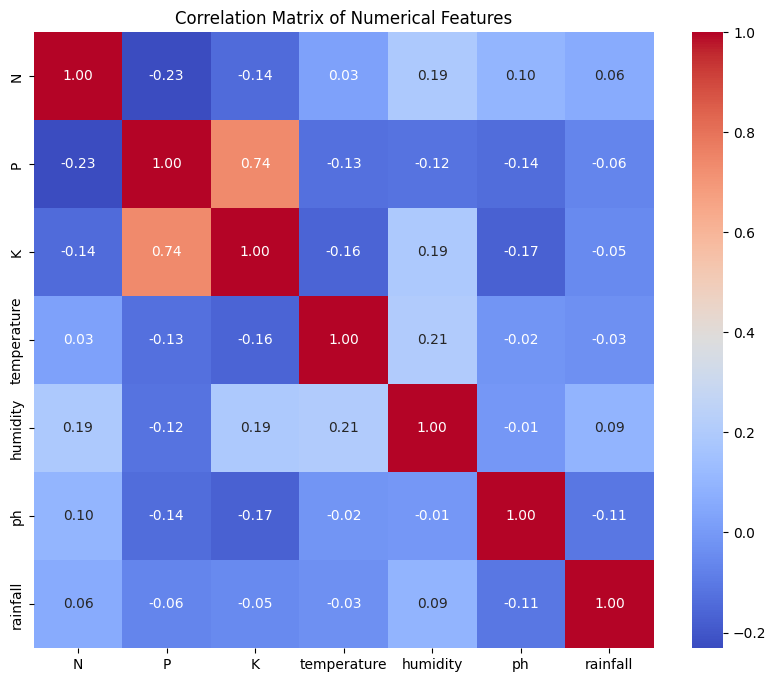

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, excluding the 'label' column
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



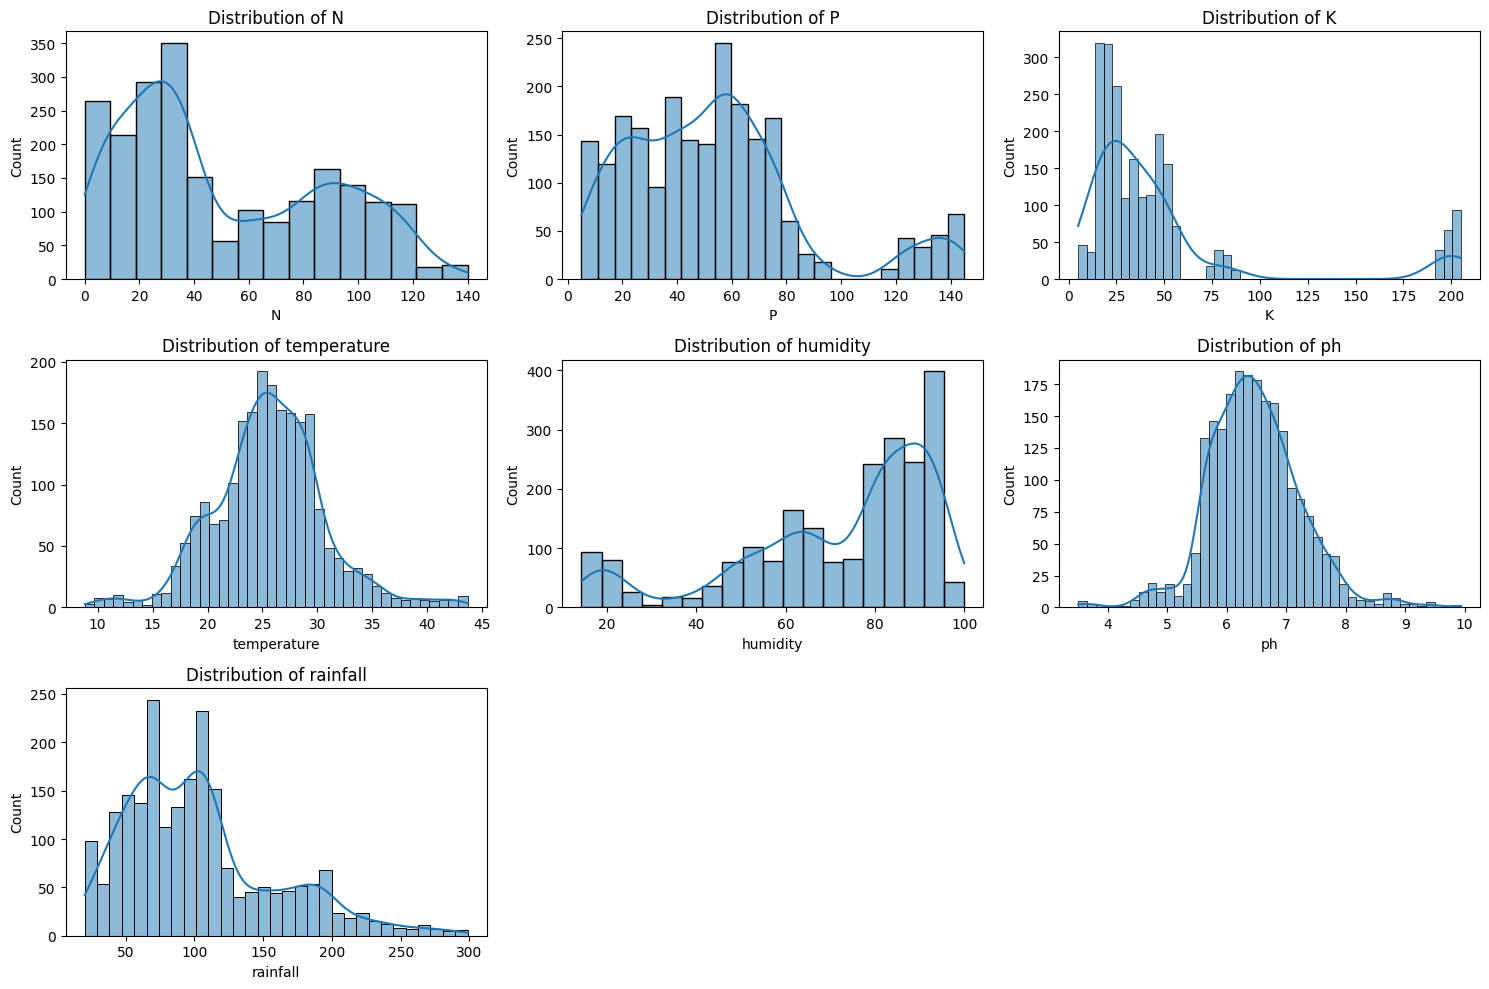

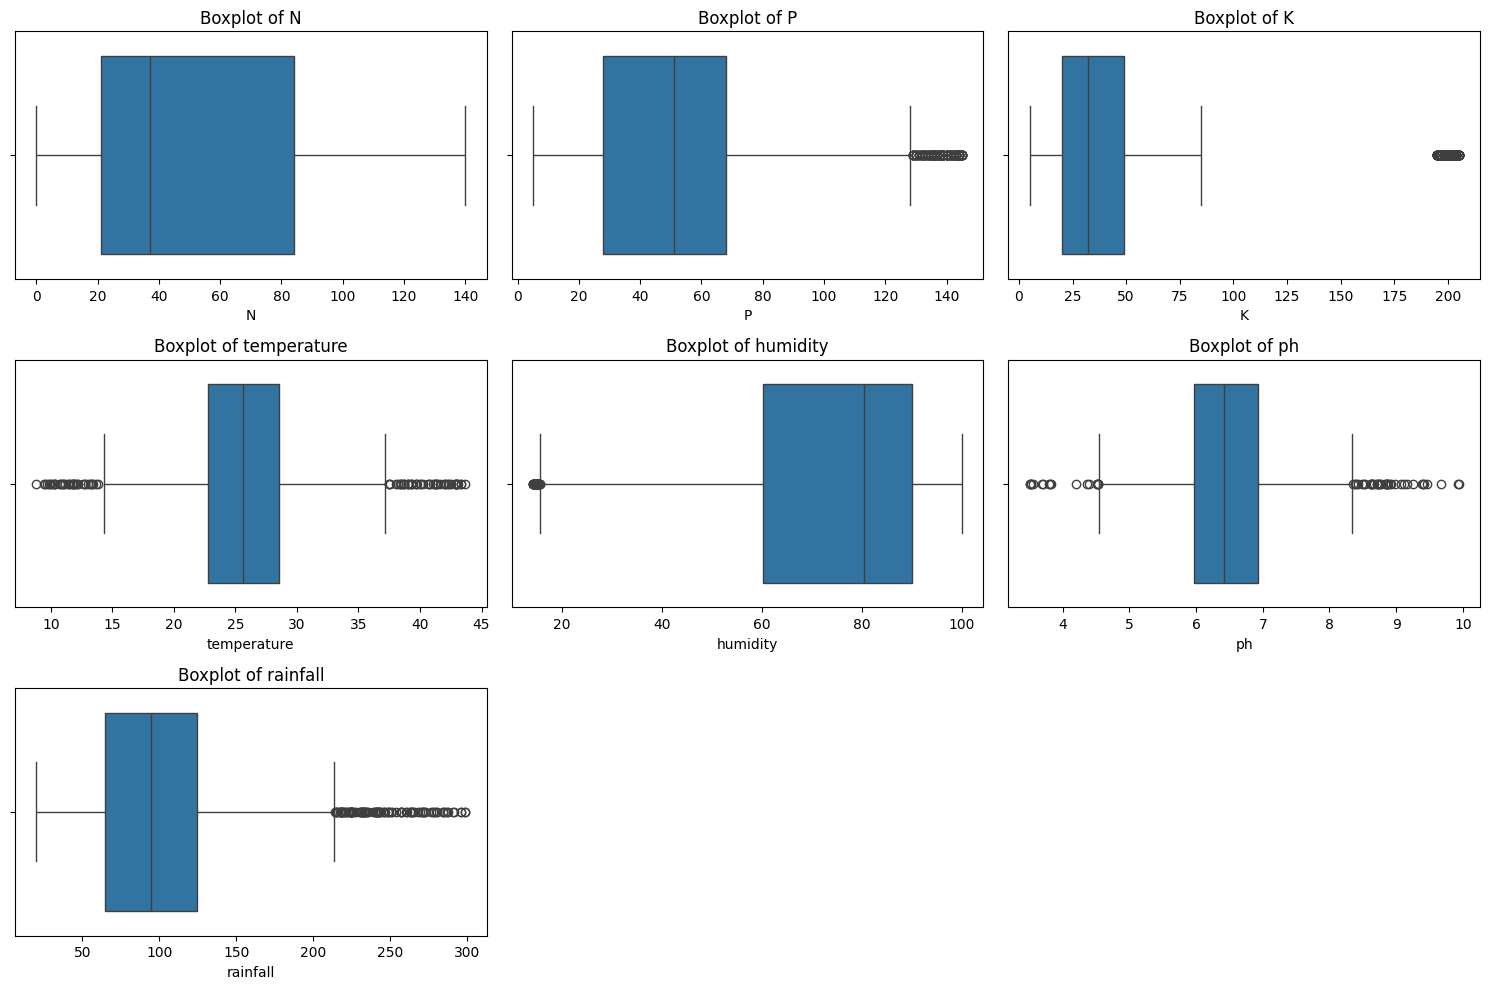

In [15]:
# Analyze the distribution of each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


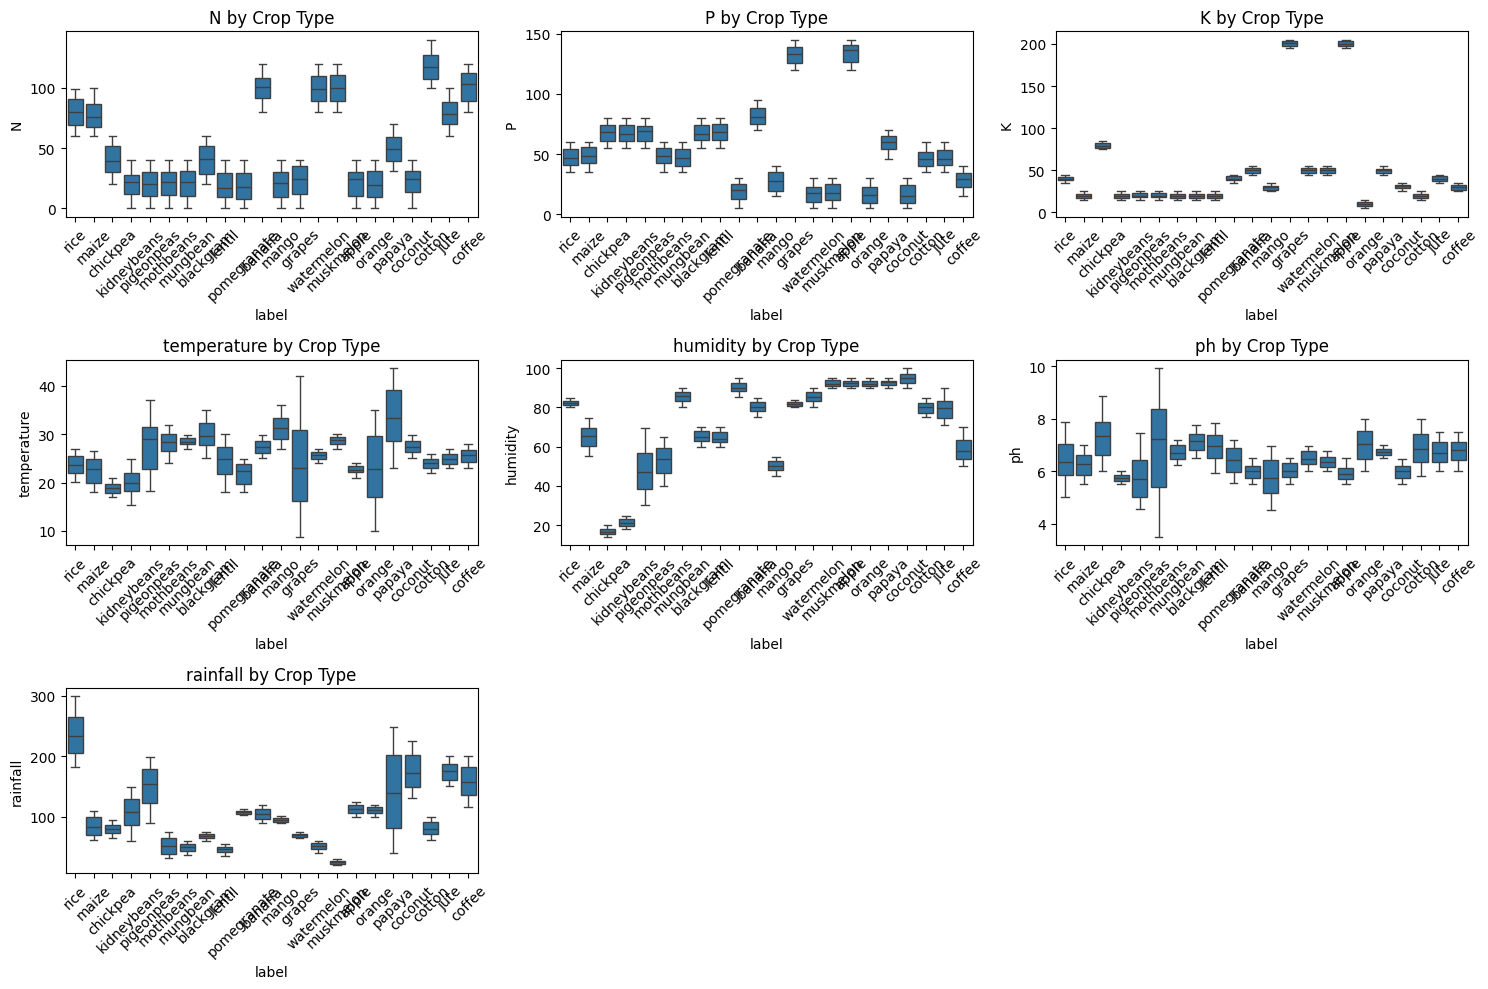

In [16]:
# Analyze the relationship between numerical features and the 'label' column
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} by Crop Type')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data visualization

Created a visualizations to explore the relationships between features, including distributions, correlations, and relationships with the 'label' column.


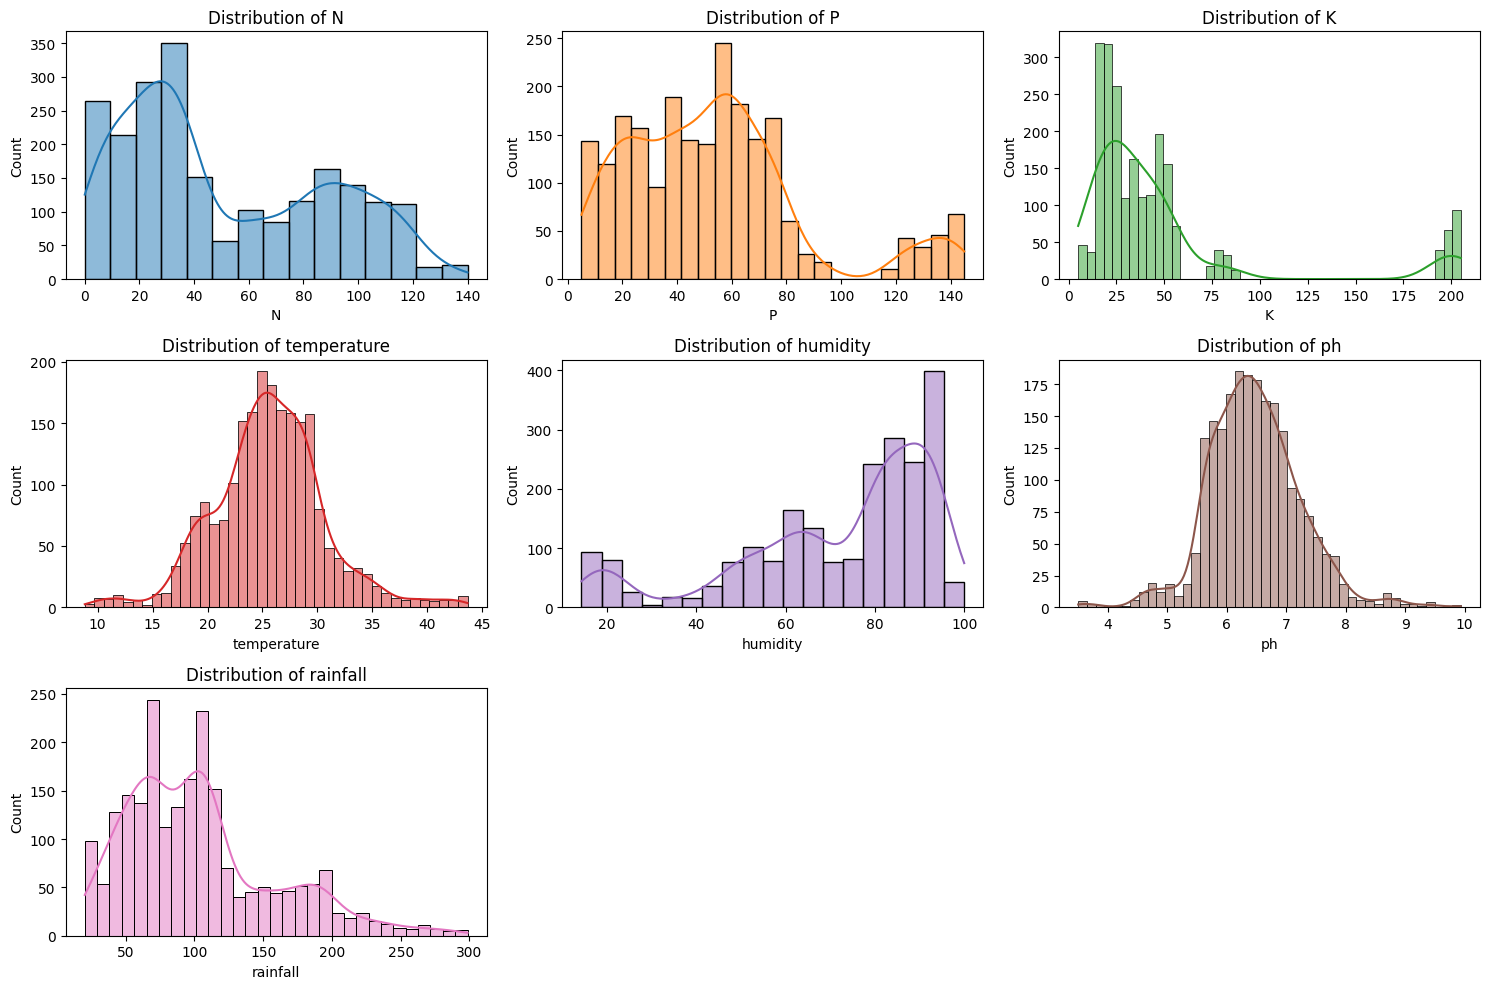

In [17]:
# Analyze the distribution of each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, color=f'C{i}')  # Use different colors
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



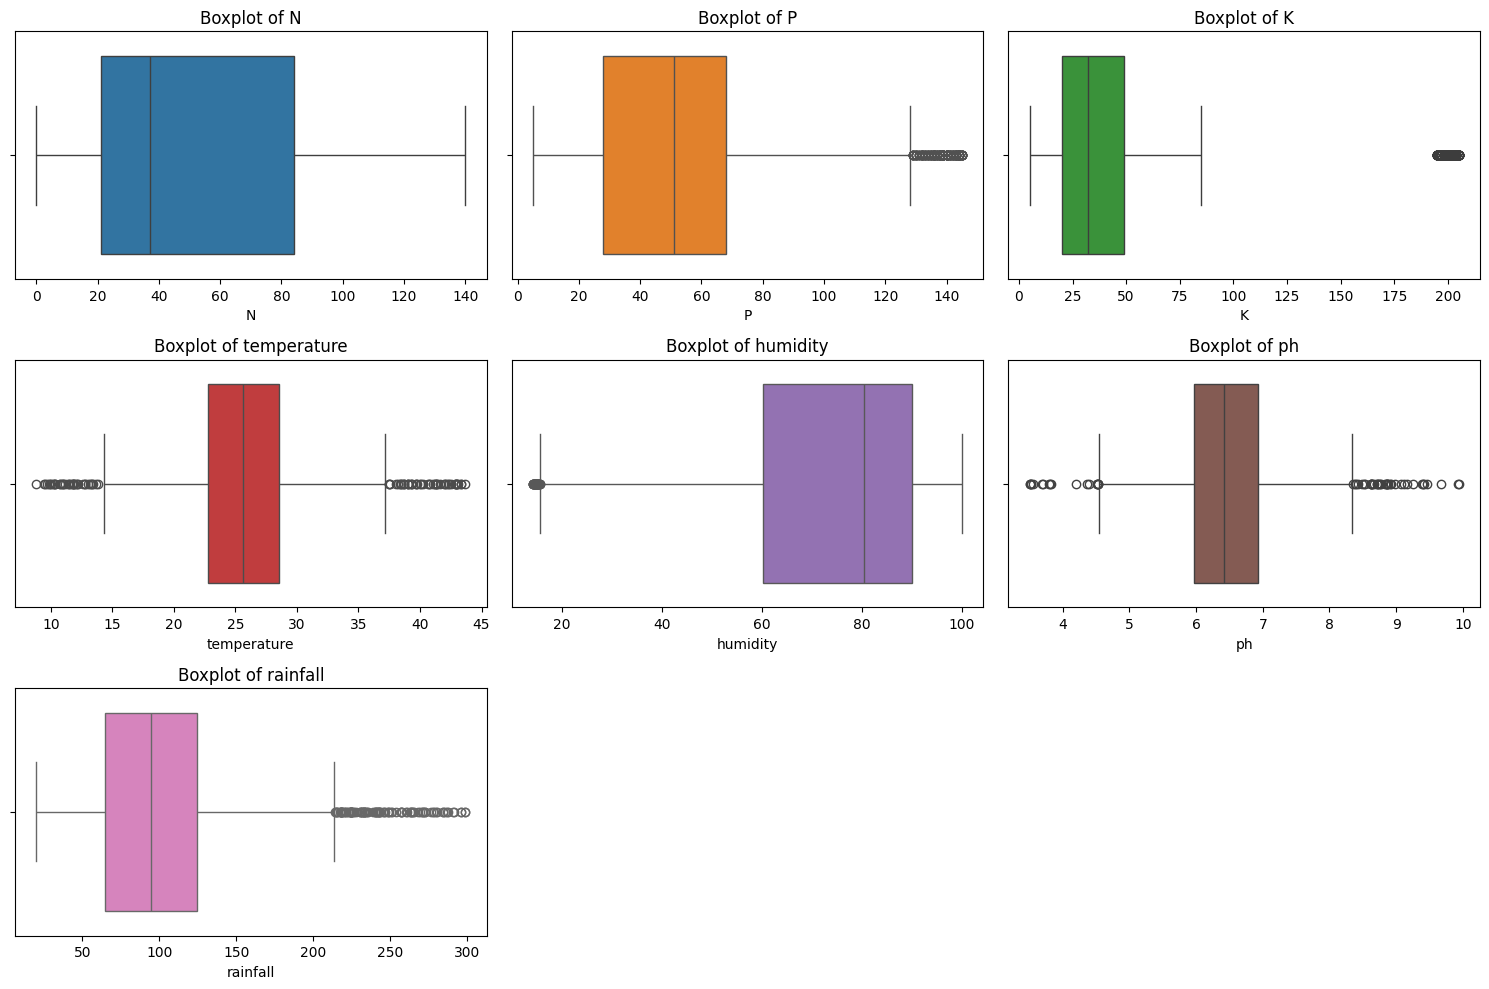

In [18]:
# Box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature], color=f'C{i}')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()




C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15128\1827285406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='Set3') # Use different color palette
C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15128\1827285406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='Set3') # Use different color palette
C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15128\1827285406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature,

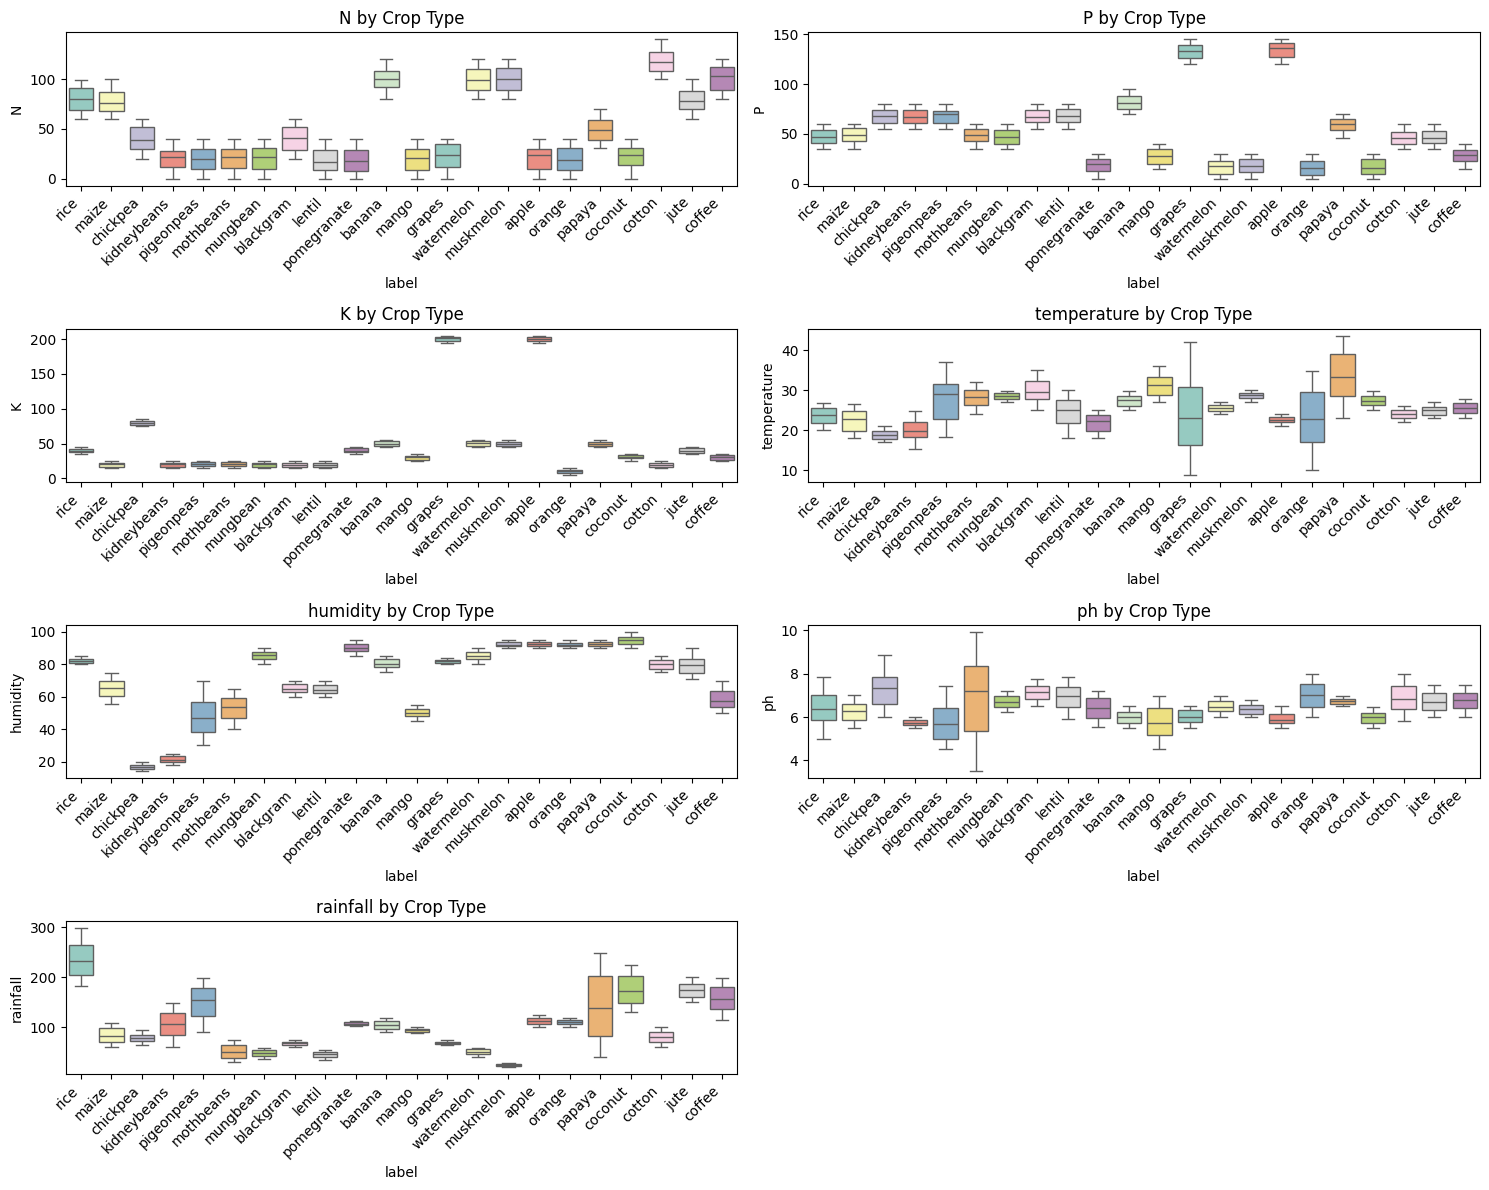

In [19]:
# Relationship between numerical features and crop type
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='label', y=feature, data=df, palette='Set3') # Use different color palette
    plt.title(f'{feature} by Crop Type')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


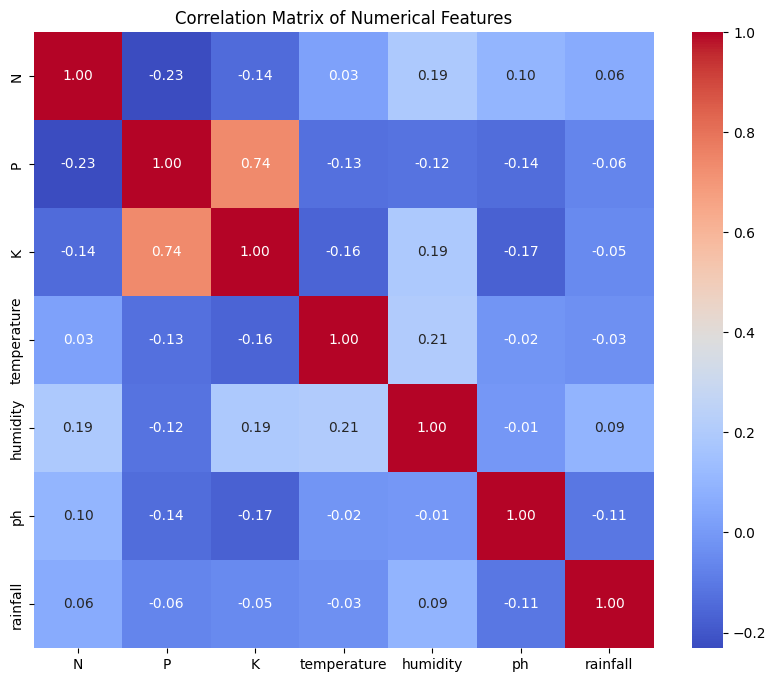

In [20]:

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



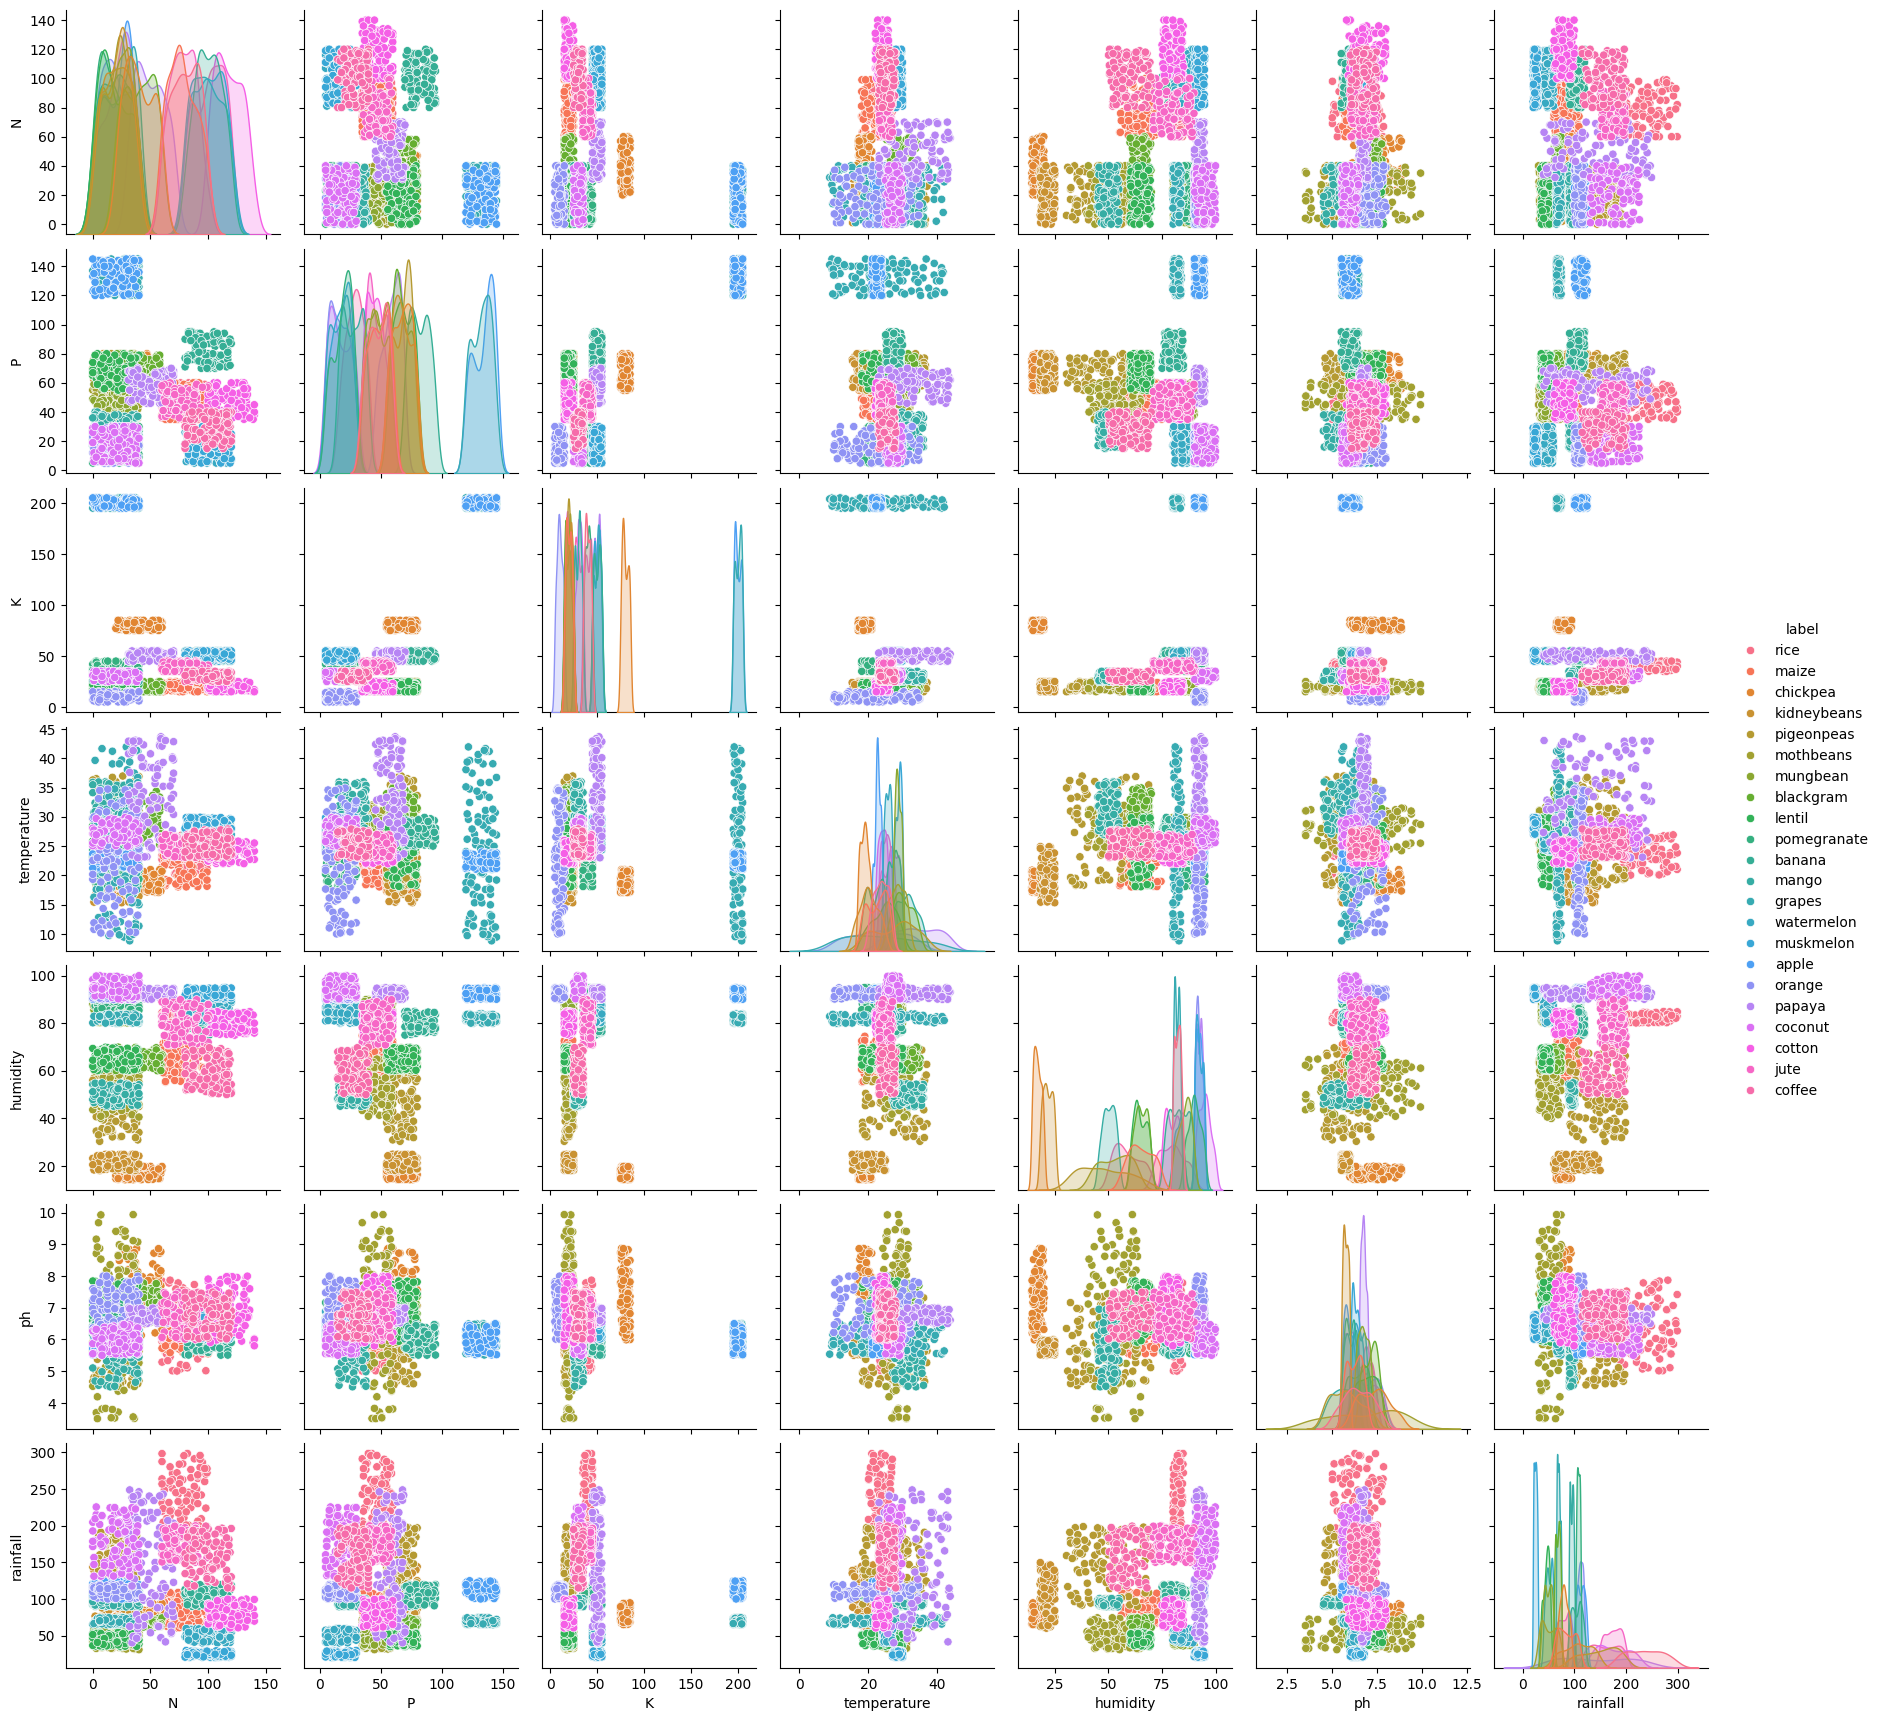

In [21]:
# Pairplot for visualizing relationships between multiple features
sns.pairplot(df, hue='label', vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], palette="husl")
plt.show()


### Data Analysis Key Findings

* **Data Characteristics:** The dataset comprises 2200 instances and 8 attributes ('N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', and 'label').  The 'label' attribute is categorical, representing different crop types, each with 100 instances, indicating a balanced dataset. No missing values were found.
* **Potential Outliers:** Several numerical features, particularly 'K', exhibit potential outliers, as indicated by their maximum values being significantly higher than their 75th percentile.  Box plots were used to visualize these potential outliers.
* **Feature Correlation:**  A correlation matrix heatmap displayed the relationships between numerical features (excluding the 'label' column).  The heatmap revealed the strength and direction of correlations between pairs of numerical features.
* **Feature Distribution:** Histograms and density plots visualized the distribution of individual numerical features, while boxplots highlighted potential outliers in each feature.
* **Feature Relationships with Crop Type:** Boxplots grouped by crop type ('label') showed how the numerical features varied across different crops. This analysis revealed how each numerical feature is distributed for different crop types.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('crop_dataset.csv')

# Separate features (X) and target (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Encode the target variable (crop labels) into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9931818181818182


In [26]:
# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Model Visualization

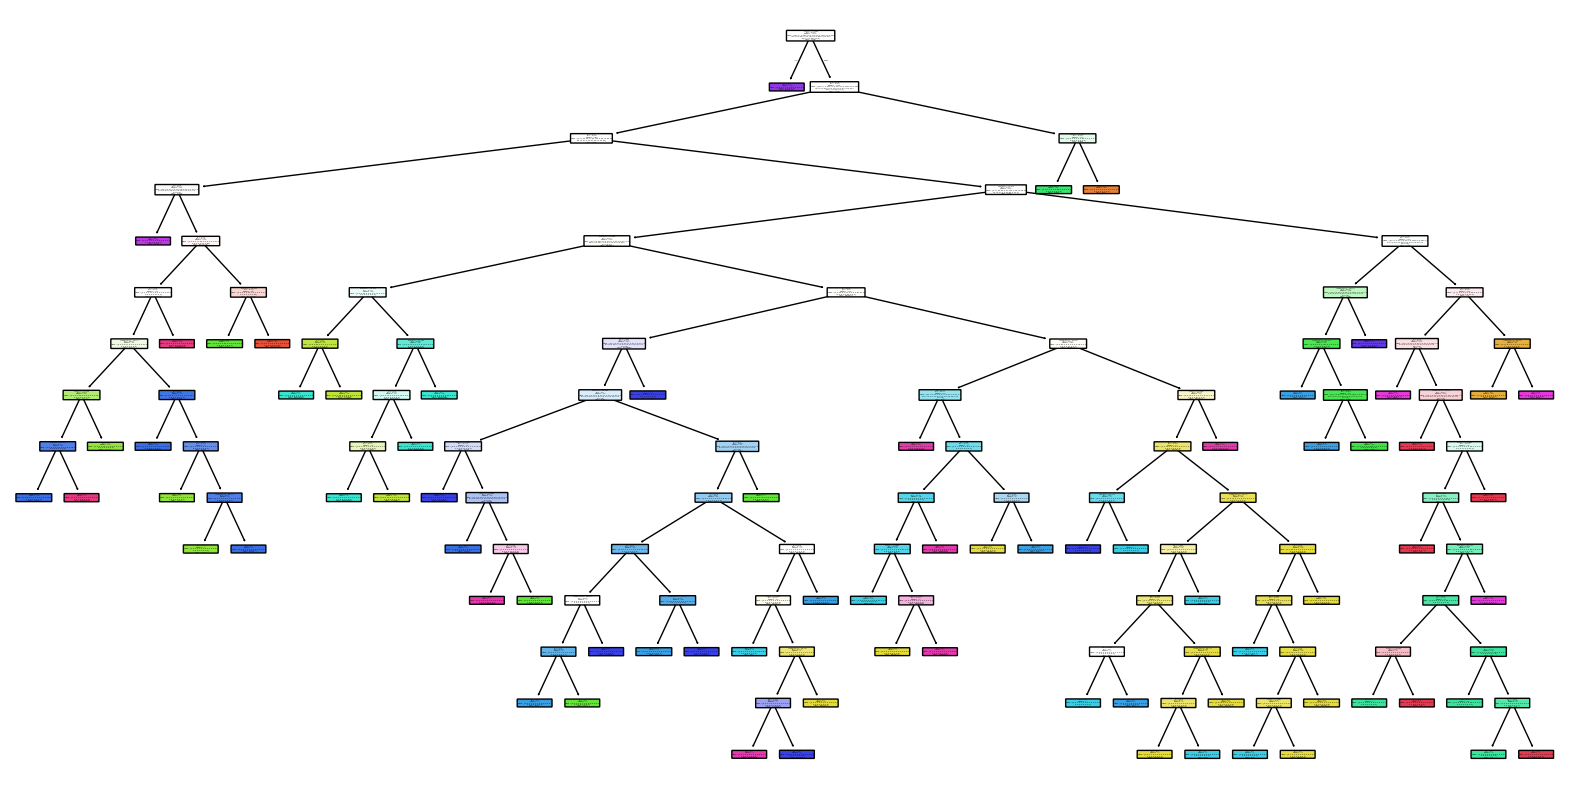

In [29]:
#visualize the model

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained RandomForestClassifier
# Visualize a single decision tree from the forest
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()



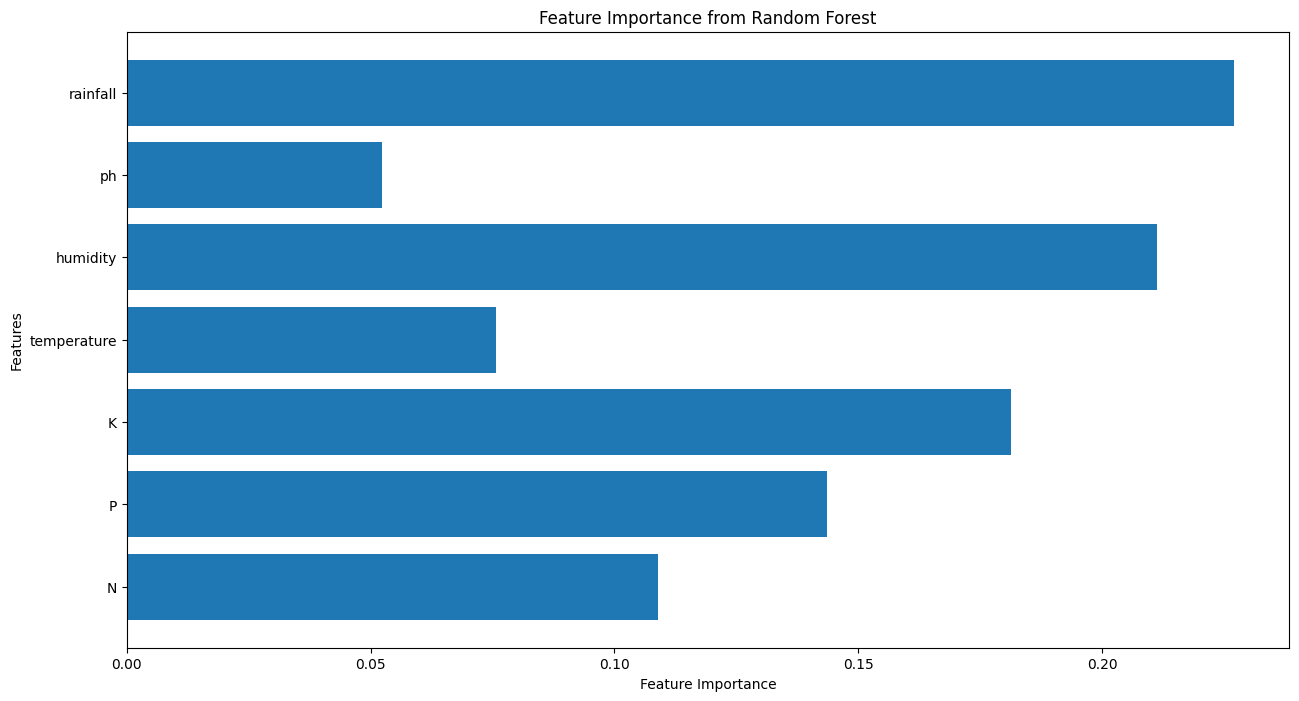

In [30]:
# Feature Importance Plot
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


## Input Field to Check the Model With Real Data

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Input fields for features
n_input = widgets.FloatText(description='N:')
p_input = widgets.FloatText(description='P:')
k_input = widgets.FloatText(description='K:')
temp_input = widgets.FloatText(description='Temperature:')
humidity_input = widgets.FloatText(description='Humidity:')
ph_input = widgets.FloatText(description='pH:')
rainfall_input = widgets.FloatText(description='Rainfall:')

# Button to trigger prediction
predict_button = widgets.Button(description='Predict Crop')

# Output widget
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output

        # Get input values
        n = n_input.value
        p = p_input.value
        k = k_input.value
        temp = temp_input.value
        humidity = humidity_input.value
        ph = ph_input.value
        rainfall = rainfall_input.value

        # Create input array
        input_data = [[n, p, k, temp, humidity, ph, rainfall]]

        # Make prediction
        prediction = model.predict(input_data)[0]
        predicted_crop = label_encoder.inverse_transform([prediction])[0]


        print(f'Predicted Crop: {predicted_crop}')


predict_button.on_click(on_predict_button_clicked)


In [32]:
# Display input fields and button
display(n_input, p_input, k_input, temp_input, humidity_input, ph_input, rainfall_input, predict_button, output)


FloatText(value=0.0, description='N:')

FloatText(value=0.0, description='P:')

FloatText(value=0.0, description='K:')

FloatText(value=0.0, description='Temperature:')

FloatText(value=0.0, description='Humidity:')

FloatText(value=0.0, description='pH:')

FloatText(value=0.0, description='Rainfall:')

Button(description='Predict Crop', style=ButtonStyle())

Output()